# Sentiment Classification


### Generate Word Embeddings and retrieve outputs of each layer with Keras based on Classification task

Word embeddings are a type of word representation that allows words with similar meaning to have a similar representation.

It is a distributed representation for text that is perhaps one of the key breakthroughs for the impressive performance of deep learning methods on challenging natural language processing problems.

We willl use the imdb dataset to learn word embeddings as we train our dataset. This dataset contains 25,000 movie reviews from IMDB, labeled with sentiment (positive or negative). 



### Dataset

`from keras.datasets import imdb`

Dataset of 25,000 movies reviews from IMDB, labeled by sentiment (positive/negative). Reviews have been preprocessed, and each review is encoded as a sequence of word indexes (integers). For convenience, the words are indexed by their frequency in the dataset, meaning the for that has index 1 is the most frequent word. Use the first 20 words from each review to speed up training, using a max vocab size of 10,000.

As a convention, "0" does not stand for a specific word, but instead is used to encode any unknown word.


### Aim

1. Import test and train data  
2. Import the labels ( train and test) 
3. Get the word index and then Create key value pair for word and word_id. (12.5 points)
4. Build a Sequential Model using Keras for Sentiment Classification task. (10 points)
5. Report the Accuracy of the model. (5 points)  
6. Retrive the output of each layer in keras for a given single test sample from the trained model you built. (2.5 points)


#### Usage:

In [0]:
from keras.datasets import imdb
import matplotlib.pyplot as plt

from keras.models import Sequential
from keras.layers import Dense, Embedding, LSTM, SpatialDropout1D
from keras.layers import Bidirectional, GlobalMaxPool1D
from keras.layers import Dense , Input , LSTM , Embedding, Dropout , Activation, GRU, Flatten

vocab_size = 10000 #vocab size
index_from=3   # start word index from 3,  first 3 are for special chars 

In [0]:
import numpy as np
# save np.load
np_load_old = np.load

# modify the default parameters of np.load
np.load = lambda *a,**k: np_load_old(*a, allow_pickle=True, **k)

# call load_data with allow_pickle implicitly set to true
(x_train, y_train), (x_test, y_test)  = imdb.load_data(num_words=vocab_size, index_from=index_from)

# restore np.load for future normal usage
np.load = np_load_old

In [135]:
print(x_train.shape,y_train.shape)
print(x_test.shape,y_test.shape)

((25000,), (25000,))
((25000,), (25000,))


In [136]:
x_train

array([list([1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]),
       list([1, 194, 1153, 194, 8255, 78, 228,

In [0]:
# Get word Index for
word_index = imdb.get_word_index()
index_word = {(v+index_from):k for k,v in word_index.items()}

In [138]:
# Index starts form 4 as defined in imdb.load_data(
print(index_word)

{4: u'the', 5: u'and', 6: u'a', 7: u'of', 8: u'to', 9: u'is', 10: u'br', 11: u'in', 12: u'it', 13: u'i', 14: u'this', 15: u'that', 16: u'was', 17: u'as', 18: u'for', 19: u'with', 20: u'movie', 21: u'but', 22: u'film', 23: u'on', 24: u'not', 25: u'you', 26: u'are', 27: u'his', 28: u'have', 29: u'he', 30: u'be', 31: u'one', 32: u'all', 33: u'at', 34: u'by', 35: u'an', 36: u'they', 37: u'who', 38: u'so', 39: u'from', 40: u'like', 41: u'her', 42: u'or', 43: u'just', 44: u'about', 45: u"it's", 46: u'out', 47: u'has', 48: u'if', 49: u'some', 50: u'there', 51: u'what', 52: u'good', 53: u'more', 54: u'when', 55: u'very', 56: u'up', 57: u'no', 58: u'time', 59: u'she', 60: u'even', 61: u'my', 62: u'would', 63: u'which', 64: u'only', 65: u'story', 66: u'really', 67: u'see', 68: u'their', 69: u'had', 70: u'can', 71: u'were', 72: u'me', 73: u'well', 74: u'than', 75: u'we', 76: u'much', 77: u'been', 78: u'bad', 79: u'get', 80: u'will', 81: u'do', 82: u'also', 83: u'into', 84: u'people', 85: u'other'

In [0]:
# Fill the first 4 index 
index_word[0] = "<PAD>"
index_word[1] = "<START>"
index_word[2] = "<UNK>"
index_word[3] = "<UNUSED>"

In [140]:
print(index_word)

{0: '<PAD>', 1: '<START>', 2: '<UNK>', 3: '<UNUSED>', 4: u'the', 5: u'and', 6: u'a', 7: u'of', 8: u'to', 9: u'is', 10: u'br', 11: u'in', 12: u'it', 13: u'i', 14: u'this', 15: u'that', 16: u'was', 17: u'as', 18: u'for', 19: u'with', 20: u'movie', 21: u'but', 22: u'film', 23: u'on', 24: u'not', 25: u'you', 26: u'are', 27: u'his', 28: u'have', 29: u'he', 30: u'be', 31: u'one', 32: u'all', 33: u'at', 34: u'by', 35: u'an', 36: u'they', 37: u'who', 38: u'so', 39: u'from', 40: u'like', 41: u'her', 42: u'or', 43: u'just', 44: u'about', 45: u"it's", 46: u'out', 47: u'has', 48: u'if', 49: u'some', 50: u'there', 51: u'what', 52: u'good', 53: u'more', 54: u'when', 55: u'very', 56: u'up', 57: u'no', 58: u'time', 59: u'she', 60: u'even', 61: u'my', 62: u'would', 63: u'which', 64: u'only', 65: u'story', 66: u'really', 67: u'see', 68: u'their', 69: u'had', 70: u'can', 71: u'were', 72: u'me', 73: u'well', 74: u'than', 75: u'we', 76: u'much', 77: u'been', 78: u'bad', 79: u'get', 80: u'will', 81: u'do', 

In [0]:
# Create Word to index mapping dictionary 
word_index = {v:k for k,v in index_word.items()}

In [142]:
print(word_index)

{u'fawn': 34704, u'tsukino': 52009, u'nunnery': 52010, u'sonja': 16819, u'vani': 63954, u'woods': 1411, u'spiders': 16118, u'hanging': 2348, u'woody': 2292, u'trawling': 52011, u"hold's": 52012, u'comically': 11310, u'localized': 40833, u'disobeying': 30571, u"'royale": 52013, u"harpo's": 40834, u'canet': 52014, u'aileen': 19316, u'acurately': 52015, u"diplomat's": 52016, u'rickman': 25245, u'proffering': 72221, u'rumbustious': 52017, u'familiarness': 52018, u"spider'": 52019, u"wood'": 52020, u'transvestism': 40836, u"hangin'": 34705, u'screaming': 1930, u'seamier': 40837, u'wooded': 34706, u'bravora': 52021, u'grueling': 16820, u'wooden': 1639, u'snowdude': 54056, u'wednesday': 16821, u"'prix": 52022, u'altagracia': 34707, u'circuitry': 52023, u'crotch': 11588, u'shows': 287, u"tart'n'tangy": 52024, u'pantheistic': 52025, u'thrace': 52026, u"tom's": 11041, u'snuggles': 52028, u"frasier's": 52029, u'complainers': 52030, u'270': 34708, u'272': 40838, u'273': 52031, u'274': 52032, u'275

In [143]:
# Decoaded sentence of imdb. 
print(' '.join(index_word[id] for id in x_train[0] ))

<START> this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert <UNK> is an amazing actor and now the same being director <UNK> father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for <UNK> and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also <UNK> to the two little boy's that played the <UNK> of norman and paul they were just brilliant children are often left out of the <UNK> list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for wha

In [0]:
from keras.preprocessing.sequence import pad_sequences
vocab_size = 10000 #vocab size
maxlen = 20  #number of word used from each review

In [145]:
#  each review length is not same 
print(len(x_train[0]))
print(len(x_train[1]))

218
189


In [0]:
#make all sequences of the same length
x_train = pad_sequences(x_train, maxlen=maxlen)
x_test =  pad_sequences(x_test, maxlen=maxlen)

In [147]:
#  each review length is same by padding ZEROS
print(len(x_train[0]))
print(len(x_train[1]))

20
20


In [148]:
x_train

array([[  65,   16,   38, ...,   19,  178,   32],
       [  23,    4, 1690, ...,   16,  145,   95],
       [1352,   13,  191, ...,    7,  129,  113],
       ...,
       [  11, 1818, 7561, ...,    4, 3586,    2],
       [  92,  401,  728, ...,   12,    9,   23],
       [ 764,   40,    4, ...,  204,  131,    9]], dtype=int32)

In [149]:
print(x_train.shape,y_train.shape)
print(x_test.shape,y_test.shape)

((25000, 20), (25000,))
((25000, 20), (25000,))


In [0]:
y_train = np.asarray(y_train).astype('float32')
y_test = np.asarray(y_test).astype('float32')

In [162]:
y_train

array([1., 0., 0., ..., 0., 1., 0.], dtype=float32)

## Build Keras Embedding Layer Model
We can think of the Embedding layer as a dicionary that maps a index assigned to a word to a word vector. This layer is very flexible and can be used in a few ways:

* The embedding layer can be used at the start of a larger deep learning model. 
* Also we could load pre-train word embeddings into the embedding layer when we create our model.
* Use the embedding layer to train our own word2vec models.

The keras embedding layer doesn't require us to onehot encode our words, instead we have to give each word a unqiue intger number as an id. For the imdb dataset we've loaded this has already been done, but if this wasn't the case we could use sklearn [LabelEncoder](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html).

In [0]:
embed_dim = 128
lstm_out = 196

model = Sequential()
model.add(Embedding(vocab_size, embed_dim))
model.add(GRU(32, return_sequences = True))
model.add(GlobalMaxPool1D())
model.add(Dense(20, activation="relu"))
model.add(Dropout(0.05))
model.add(Dense(1, activation="sigmoid"))

In [164]:
model.compile(loss = 'binary_crossentropy', optimizer='rmsprop',metrics = ['accuracy'])
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_14 (Embedding)     (None, None, 128)         1280000   
_________________________________________________________________
gru_5 (GRU)                  (None, None, 32)          15456     
_________________________________________________________________
global_max_pooling1d_7 (Glob (None, 32)                0         
_________________________________________________________________
dense_18 (Dense)             (None, 20)                660       
_________________________________________________________________
dropout_6 (Dropout)          (None, 20)                0         
_________________________________________________________________
dense_19 (Dense)             (None, 1)                 21        
Total params: 1,296,137
Trainable params: 1,296,137
Non-trainable params: 0
_________________________________________________________________


In [165]:
print(x_train.shape,y_train.shape)
print(x_test.shape,y_test.shape)

((25000, 20), (25000,))
((25000, 20), (25000,))


In [166]:
batch_size = 100
history  = model.fit(x_train, y_train, epochs = 10, batch_size=batch_size, verbose = 2,validation_data=(x_test, y_test))

Train on 25000 samples, validate on 25000 samples
Epoch 1/10
 - 9s - loss: 0.5688 - acc: 0.7030 - val_loss: 0.4916 - val_acc: 0.7546
Epoch 2/10
 - 6s - loss: 0.4417 - acc: 0.7939 - val_loss: 0.4823 - val_acc: 0.7647
Epoch 3/10
 - 6s - loss: 0.3927 - acc: 0.8224 - val_loss: 0.4695 - val_acc: 0.7720
Epoch 4/10
 - 6s - loss: 0.3578 - acc: 0.8418 - val_loss: 0.4762 - val_acc: 0.7708
Epoch 5/10
 - 6s - loss: 0.3289 - acc: 0.8577 - val_loss: 0.4943 - val_acc: 0.7684
Epoch 6/10
 - 6s - loss: 0.3006 - acc: 0.8722 - val_loss: 0.5103 - val_acc: 0.7665
Epoch 7/10
 - 6s - loss: 0.2754 - acc: 0.8850 - val_loss: 0.5358 - val_acc: 0.7632
Epoch 8/10
 - 6s - loss: 0.2489 - acc: 0.8993 - val_loss: 0.5645 - val_acc: 0.7608
Epoch 9/10
 - 6s - loss: 0.2258 - acc: 0.9101 - val_loss: 0.5864 - val_acc: 0.7620
Epoch 10/10
 - 6s - loss: 0.1993 - acc: 0.9228 - val_loss: 0.6283 - val_acc: 0.7485


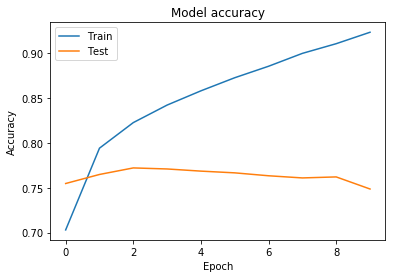

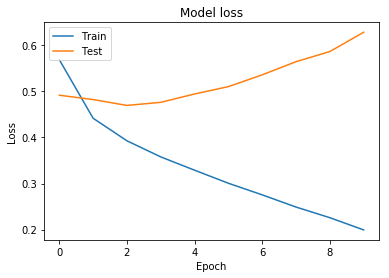

In [167]:
# Plot training & validation accuracy values
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [0]:
# Model overfits after 1st epoc

In [168]:
score,acc = model.evaluate(x_test, y_test, verbose = 2, batch_size = batch_size)
print("score: %.2f" % (score))
print("acc: %.2f" % (acc))

score: 0.63
acc: 0.75


## Retrive the output of each layer in keras for a given single test sample from the trained model you built

In [0]:
from keras import backend as K

inp = model.input                                           # input placeholder
outputs = [layer.output for layer in model.layers]          # all layer outputs
functors = [K.function([inp, K.learning_phase()], [out]) for out in outputs]    # evaluation functions

In [0]:
# Testing
test = np.random.random(25000)[np.newaxis,x_test]
test = test.reshape(-1,1)

In [210]:
for ix,func in enumerate(functors):
  print("Layer " + str(ix))
  print(func([test, 1.]))

Layer 0
[array([[[-0.08727952, -0.00206893, -0.0430766 , ...,  0.00859822,
          0.03389253, -0.03854593]],

       [[-0.08727952, -0.00206893, -0.0430766 , ...,  0.00859822,
          0.03389253, -0.03854593]],

       [[-0.08727952, -0.00206893, -0.0430766 , ...,  0.00859822,
          0.03389253, -0.03854593]],

       ...,

       [[-0.08727952, -0.00206893, -0.0430766 , ...,  0.00859822,
          0.03389253, -0.03854593]],

       [[-0.08727952, -0.00206893, -0.0430766 , ...,  0.00859822,
          0.03389253, -0.03854593]],

       [[-0.08727952, -0.00206893, -0.0430766 , ...,  0.00859822,
          0.03389253, -0.03854593]]], dtype=float32)]
Layer 1
[array([[[ 0.00927708,  0.01675273, -0.13889876, ..., -0.00229543,
         -0.02793845,  0.05670379]],

       [[ 0.00927708,  0.01675273, -0.13889876, ..., -0.00229543,
         -0.02793845,  0.05670379]],

       [[ 0.00927708,  0.01675273, -0.13889876, ..., -0.00229543,
         -0.02793845,  0.05670379]],

       ...,

    